In [2]:
# ============================================
# LIBRARIES & DIRECTORIES, LOADS DATA
# =============================================

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

FEATURE_FILE = os.path.join("..", "data", "processed", "flux_with_features.csv")
df = pd.read_csv(FEATURE_FILE)
df["time"] = pd.to_datetime(df["time"])

print("Dataset shape:", df.shape)

Dataset shape: (4307040, 55)


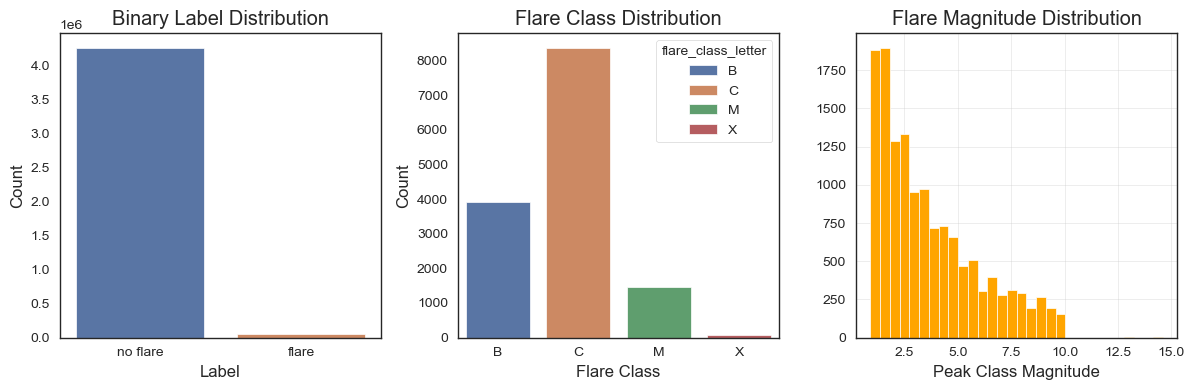

In [ ]:
# ============================================
# DISTRIBUTION PLOTS
# =============================================

df["binary_label_named"] = df["binary_label"].map({0: "no flare", 1: "flare"})
df["flare_class_letter"] = df["multiclass_label"].map({1: "B", 2: "C", 3: "M", 4: "X"})

plt.figure(figsize=(12, 4))

sns.set_style('white')

# Plot 1: a binary label bar graph showing the distribution of times labeled flare/non-flare
plt.subplot(1, 3, 1)
sns.countplot(x="binary_label_named", data=df, order=["no flare", "flare"], palette="deep", hue="binary_label_named")
plt.title("Binary Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")

# Plot 2: a multi-class label bar graph showing the distribution of flares labeled B/C/m/X
plt.subplot(1, 3, 2)
sns.countplot(x="flare_class_letter", data=df, order=["B", "C", "M", "X"], palette="deep", hue="flare_class_letter")
plt.title("Flare Class Distribution")
plt.xlabel("Flare Class")
plt.ylabel("Count")

# Plot 3: a histogram showing the distribution of solar flare magnitude
plt.subplot(1, 3, 3)
df["regression_target"].dropna().hist(bins=30, color="orange")
plt.title("Flare Magnitude Distribution")
plt.xlabel("Peak Class Magnitude")
plt.grid(linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

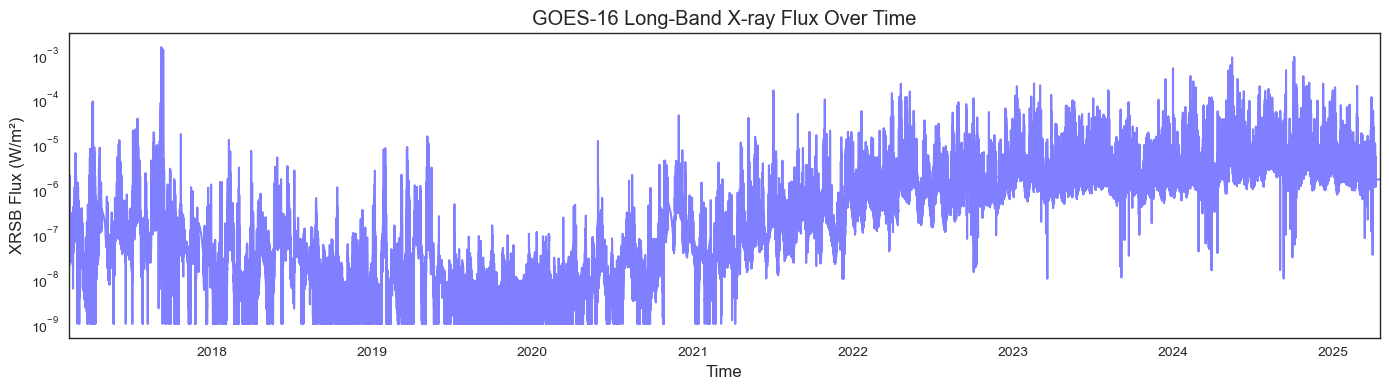

In [ ]:
# ============================================
# TIME-SERIES OVERVIEW OF FLUX FROM LAUNCH OF GOES-16 TO PRESENT
# =============================================

# Plot
plt.figure(figsize=(14, 4))
sns.set_style('white')
df.set_index("time")["xrsb_flux"].plot(logy=True, color="blue", alpha=0.5)
plt.title("GOES-16 Long-Band X-ray Flux Over Time")
plt.ylabel("XRSB Flux (W/m²)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

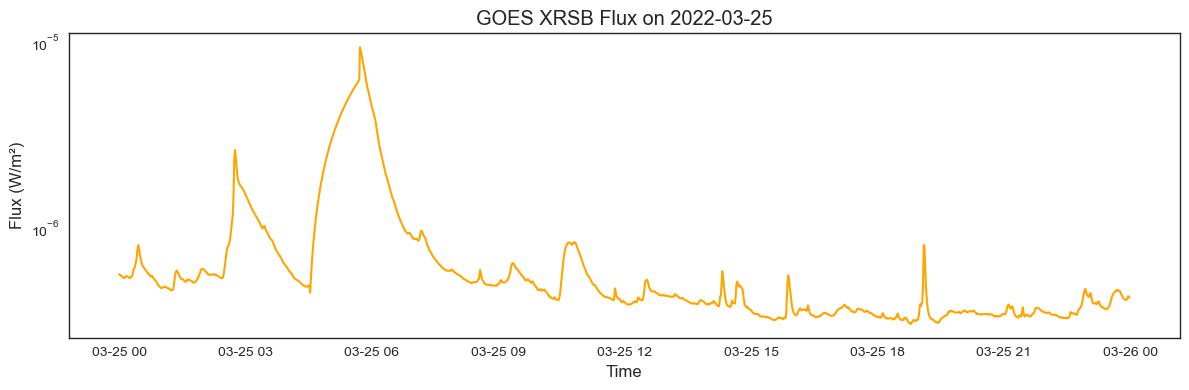

In [ ]:
# ============================================
# TIME-SERIES OVERVIEW OF FLUX FOR ONE DAY
# =============================================

sample_day = "2022-03-25"

# Plot
df_day = df[df["time"].dt.date == pd.to_datetime(sample_day).date()]
plt.figure(figsize=(12, 4))
sns.set_style('white')
plt.plot(df_day["time"], df_day["xrsb_flux"], color="orange")
plt.yscale("log")
plt.title(f"GOES XRSB Flux on {sample_day}")
plt.ylabel("Flux (W/m²)")
plt.xlabel("Time")
plt.tight_layout()
plt.show()


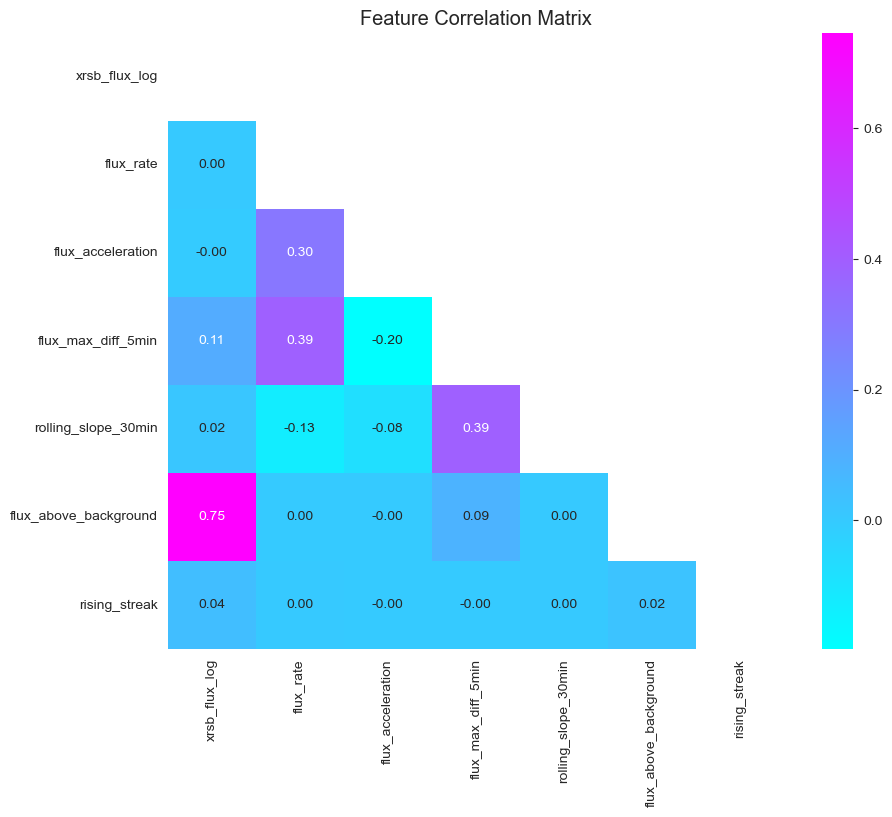

In [37]:
# ============================================
# SAMPLE FEATURE CORRELATION MATRIX
# =============================================

feature_cols = [
    "xrsb_flux_log", "flux_rate", "flux_acceleration",
    "flux_max_diff_5min", "rolling_slope_30min", "flux_above_background",
    "rising_streak"
]

# Messily computes correlation matrix
corr = df[feature_cols].corr()

# Manually creates a mask to hide the upper triangle and middle diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            mask=mask, 
            annot=True, # puts correlation values in cells
            cmap="cool", # color palette
            fmt=".2f", # formats the annotations to 2 decimals
            cbar=True, # displays the color bar on the right
            square=True) # forces square shape of cells
plt.title("Feature Correlation Matrix")
plt.show()

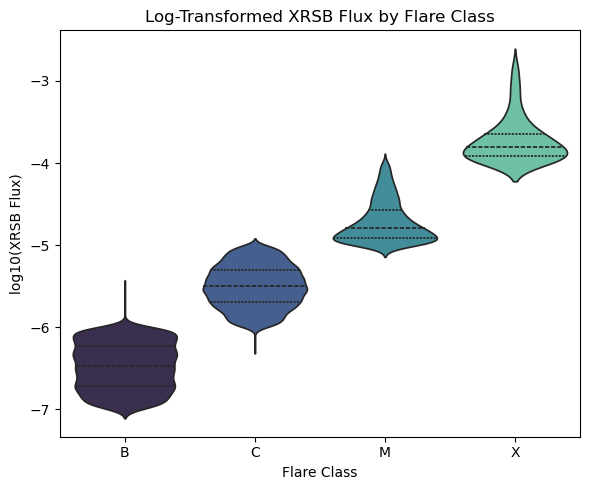

In [ ]:
# ============================================
# FLARE MAGNITUDE BY CLASS VIOLIN PLOTS
# =============================================

# Maps numbers to letteres
class_map = {1: "B", 2: "C", 3: "M", 4: "X"}
df["flare_class_letter"] = df["multiclass_label"].map(class_map) # Makes a new column with letters (B, C, M, X) using the 'class_map' dictionary 

# Plot
plt.figure(figsize=(6, 5))
sns.violinplot(
    x="flare_class_letter", 
    y="xrsb_flux_log",
    hue="flare_class_letter",
    data=df, 
    inner="quartile", # shows IQR inside of violins
    legend=False, 
    palette="mako"
)
plt.title("Log-Transformed XRSB Flux by Flare Class")
plt.xlabel("Flare Class")
plt.ylabel("log10(XRSB Flux)")
plt.tight_layout()
plt.show()

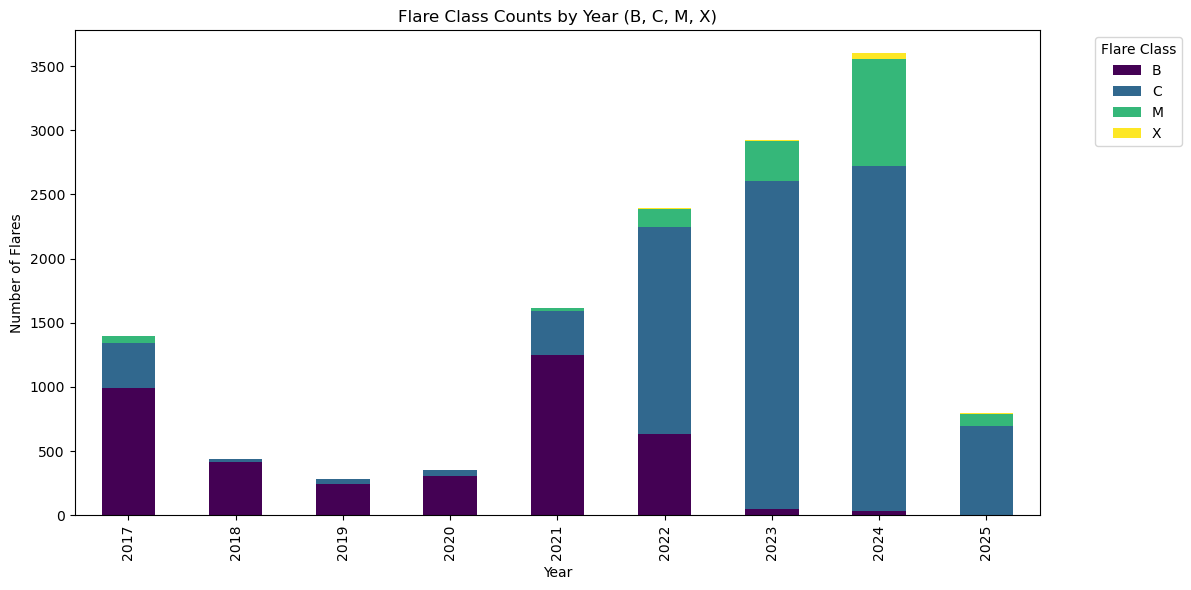

In [ ]:
# ============================================
# FLARE COUNTS OVER TIME BY CLASS
# =============================================

# Groups by year and flare class
class_year_counts = df.groupby(["year", "multiclass_label"]).size().unstack(fill_value=0)

# Maps order of classes
class_order = [1, 2, 3, 4]  # B, C, M, X
class_map = {1: "B", 2: "C", 3: "M", 4: "X"}

# Reorders and renames the columns by 'class_order' and 'class_map'
class_year_counts = class_year_counts[class_order]
class_year_counts.columns = [class_map[c] for c in class_order]

# Plot
class_year_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Flare Class Counts by Year (B, C, M, X)")
plt.ylabel("Number of Flares")
plt.xlabel("Year")
plt.legend(title="Flare Class", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()